### Construction of B-Spline Basis Functions

B-Spline Basis Functions are a computationally efficient and equivalent representation of continous piecewise polynomials, commonly known as Splines. These are defined recursively as

$$B_{i,0}(x) = \begin{cases} 1 & \text{if } x_i \leq x < x_{i+1} \\ 0 & \text{otherwise} \end{cases}$$

$$B_{i,k}(x) = \frac{x-x_i}{x_{i+k}-x_i}B_{i,k-1}(x) + \frac{x_{i+k+1}-x}{x_{i+k+1}-x_{i+1}}B_{i+1,k-1}(x)$$

where $x_i$ and $x_{i+1}$ are the knots of the spline. The $B_{i,k}$ are called B-Spline Basis Functions of degree $k$.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from b_spline_basis import B_Spline_Basis

### Let's generate some data and fix quantile knots

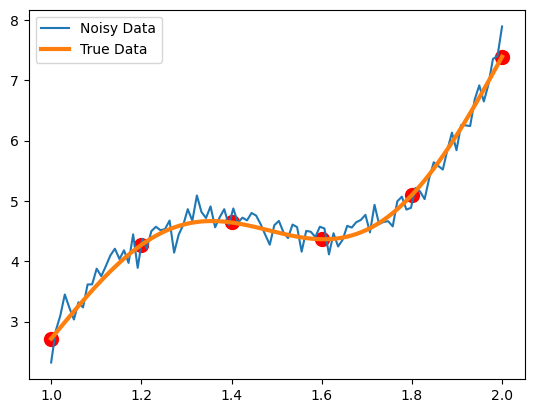

In [2]:
x=np.linspace(1,2,100)
y=np.sin(2*np.pi*x)+np.exp(x)
noisy=y+np.random.normal(0,0.2,100)
gamma=np.linspace(1,2,6)

plt.plot(x,noisy, label='Noisy Data')
plt.plot(x,y, label='True Data',lw=3)
plt.legend()

plt.scatter(gamma,np.sin(2*np.pi*gamma)+np.exp(gamma), label='Design Points',s=100,color='red')

In [3]:
basis=B_Spline_Basis(x,gamma,m=3)

In [7]:
design_matrix=np.linspace(1,2,10)

In [8]:
eval_basis=basis.B(design_matrix)

In [9]:
eval_basis.shape

(14, 4, 10)